In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from datetime import date, timedelta

### Input

In [2]:
stock_symbol = input("Enter Stock Symbol:")  
train_start_date = "2010-01-01"
train_end_date = "2022-07-31"
test_start_date = "2022-08-01"
test_end_date = date.today() - timedelta(1)
today_date = date.today()
forecast_days = 10

Enter Stock Symbol:UBER


### Import Data

In [3]:
df_train = yf.download(stock_symbol, start=train_start_date, end=train_end_date)
df_train

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2022-07-25,23.270000,23.540001,22.629999,23.350000,23.350000,12923000
2022-07-26,23.150000,23.150000,22.450001,22.549999,22.549999,24402800
2022-07-27,23.000000,23.320000,22.490000,23.090000,23.090000,28384300


### Process Data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2019-05-10 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       812 non-null    float64
 1   High       812 non-null    float64
 2   Low        812 non-null    float64
 3   Close      812 non-null    float64
 4   Adj Close  812 non-null    float64
 5   Volume     812 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.4 KB


In [5]:
train_data = df_train["Close"].values.reshape(-1,1)
train_data

array([[41.56999969],
       [37.09999847],
       [39.95999908],
       [41.29000092],
       [43.        ],
       [41.90999985],
       [41.59000015],
       [41.5       ],
       [41.25      ],
       [40.47000122],
       [41.50999832],
       [40.95000076],
       [39.93999863],
       [39.79999924],
       [40.40999985],
       [41.25      ],
       [42.75      ],
       [45.        ],
       [44.91999817],
       [44.15999985],
       [42.61000061],
       [42.45000076],
       [42.16999817],
       [44.31000137],
       [43.22999954],
       [43.77999878],
       [43.86000061],
       [44.86000061],
       [43.86000061],
       [44.        ],
       [43.09000015],
       [43.09000015],
       [42.5       ],
       [45.13000107],
       [46.38000107],
       [44.27000046],
       [44.        ],
       [44.22999954],
       [43.52999878],
       [42.95000076],
       [44.20000076],
       [43.70000076],
       [43.99000168],
       [43.99000168],
       [44.52999878],
       [44

In [6]:
sc = MinMaxScaler()
train_data = sc.fit_transform(train_data)

### Train the Model

In [7]:
X_train = []
y_train = []
sequence = 60

for i in range(sequence, len(train_data)):           # (60, 2960)
    X_train.append(train_data[i-sequence:i, 0])
    y_train.append(train_data[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [9]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
24/24 - 13s - loss: 0.0429 - 13s/epoch - 558ms/step
Epoch 2/20
24/24 - 4s - loss: 0.0110 - 4s/epoch - 170ms/step
Epoch 3/20
24/24 - 4s - loss: 0.0079 - 4s/epoch - 184ms/step
Epoch 4/20
24/24 - 4s - loss: 0.0079 - 4s/epoch - 173ms/step
Epoch 5/20
24/24 - 4s - loss: 0.0069 - 4s/epoch - 167ms/step
Epoch 6/20
24/24 - 4s - loss: 0.0074 - 4s/epoch - 168ms/step
Epoch 7/20
24/24 - 4s - loss: 0.0088 - 4s/epoch - 164ms/step
Epoch 8/20
24/24 - 4s - loss: 0.0064 - 4s/epoch - 164ms/step
Epoch 9/20
24/24 - 4s - loss: 0.0070 - 4s/epoch - 164ms/step
Epoch 10/20
24/24 - 4s - loss: 0.0066 - 4s/epoch - 164ms/step
Epoch 11/20
24/24 - 4s - loss: 0.0060 - 4s/epoch - 164ms/step
Epoch 12/20
24/24 - 4s - loss: 0.0054 - 4s/epoch - 164ms/step
Epoch 13/20
24/24 - 4s - loss: 0.0048 - 4s/epoch - 169ms/step
Epoch 14/20
24/24 - 4s - loss: 0.0048 - 4s/epoch - 168ms/step
Epoch 15/20
24/24 - 4s - loss: 0.0047 - 4s/epoch - 164ms/step
Epoch 16/20
24/24 - 4s - loss: 0.0048 - 4s/epoch - 165ms/step
Epoch 17/20
24/

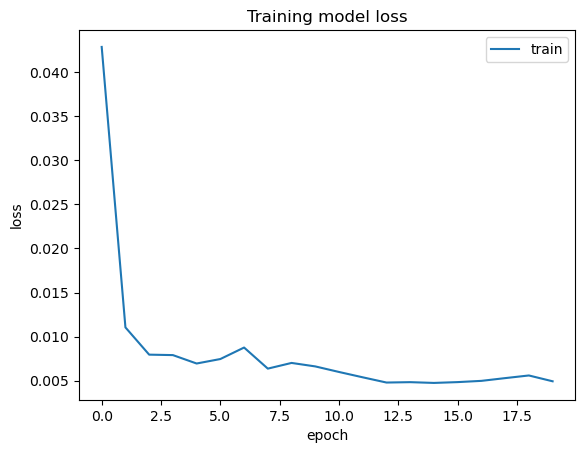

In [10]:
plt.plot(hist.history["loss"])
plt.title("Training model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train"], loc="upper right")
plt.show()

### Test the Model

In [11]:
df_test = yf.download(stock_symbol, start=test_start_date, end=test_end_date)
df_test

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,23.430000,24.620001,22.885000,24.600000,24.600000,46960700
2022-08-02,28.490000,29.430000,27.100000,29.250000,29.250000,107926300
2022-08-03,29.719999,31.430000,29.360001,30.190001,30.190001,62061200
2022-08-04,29.780001,32.230000,29.600000,31.850000,31.850000,55573600
2022-08-05,31.200001,32.630001,31.040001,32.009998,32.009998,39963600
...,...,...,...,...,...,...
2023-09-20,46.865002,47.540001,46.400002,46.549999,46.549999,22582000
2023-09-21,45.790001,45.790001,43.930000,44.599998,44.599998,27865700
2023-09-22,45.160000,45.345001,44.029999,44.410000,44.410000,16105900


In [12]:
test_data = df_test["Close"].values.reshape(-1,1)
test_data

array([[24.60000038],
       [29.25      ],
       [30.19000053],
       [31.85000038],
       [32.00999832],
       [31.85000038],
       [31.05999947],
       [32.79999924],
       [32.24000168],
       [32.47000122],
       [32.49000168],
       [32.38000107],
       [30.71999931],
       [30.14999962],
       [29.01000023],
       [28.        ],
       [27.80999947],
       [28.70999908],
       [29.62000084],
       [28.57999992],
       [28.73999977],
       [28.70999908],
       [28.76000023],
       [28.92000008],
       [29.04999924],
       [28.88999939],
       [30.03000069],
       [30.68000031],
       [31.78000069],
       [32.5       ],
       [31.31999969],
       [33.04999924],
       [33.13000107],
       [31.93000031],
       [31.48999977],
       [31.48999977],
       [30.46999931],
       [28.57999992],
       [27.81999969],
       [26.88999939],
       [27.56999969],
       [28.04000092],
       [26.42000008],
       [26.5       ],
       [26.71999931],
       [29

In [13]:
scaled_test_data = sc.transform(test_data)
scaled_test_data

array([[0.20223326],
       [0.2983871 ],
       [0.31782466],
       [0.35215055],
       [0.35545902],
       [0.35215055],
       [0.33581471],
       [0.37179486],
       [0.36021509],
       [0.36497108],
       [0.36538465],
       [0.36311003],
       [0.32878411],
       [0.31699751],
       [0.29342432],
       [0.27253929],
       [0.26861041],
       [0.28722083],
       [0.30603807],
       [0.28453267],
       [0.28784119],
       [0.28722083],
       [0.28825476],
       [0.29156328],
       [0.29425143],
       [0.29094292],
       [0.31451615],
       [0.327957  ],
       [0.35070308],
       [0.3655914 ],
       [0.34119106],
       [0.37696442],
       [0.37861872],
       [0.35380481],
       [0.34470637],
       [0.34470637],
       [0.32361455],
       [0.28453267],
       [0.2688172 ],
       [0.24958643],
       [0.26364764],
       [0.27336644],
       [0.23986766],
       [0.24152192],
       [0.24607112],
       [0.29714642],
       [0.29693963],
       [0.308

In [14]:
X_test = []

for i in range(sequence, len(scaled_test_data)):           # (60, 419)
    X_test.append(scaled_test_data[i-sequence:i, 0])
    
X_test = np.array(X_test)

In [15]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(231, 60, 1)

In [16]:
y_predict = model.predict(X_test)
y_predict

8/8 [==============================] - 2s 56ms/step


array([[0.25261015],
       [0.26118353],
       [0.27001947],
       [0.27768248],
       [0.28301907],
       [0.28493214],
       [0.28547376],
       [0.28599167],
       [0.28704518],
       [0.28841007],
       [0.28918576],
       [0.28859317],
       [0.28581503],
       [0.28240502],
       [0.28017104],
       [0.2800789 ],
       [0.2839819 ],
       [0.29132882],
       [0.29967362],
       [0.30681252],
       [0.3109556 ],
       [0.3113799 ],
       [0.30896196],
       [0.30483657],
       [0.29958788],
       [0.29378578],
       [0.2889945 ],
       [0.28577596],
       [0.28442347],
       [0.28408155],
       [0.28334147],
       [0.28101236],
       [0.2768219 ],
       [0.2713049 ],
       [0.26565447],
       [0.26087874],
       [0.25789163],
       [0.25620493],
       [0.2549155 ],
       [0.25270295],
       [0.24893695],
       [0.24402048],
       [0.23826522],
       [0.23214291],
       [0.22605106],
       [0.22051674],
       [0.21617872],
       [0.213

In [17]:
predict_price = sc.inverse_transform(y_predict)
predict_price

array([[27.036228],
       [27.450834],
       [27.878141],
       [28.248726],
       [28.506804],
       [28.59932 ],
       [28.625511],
       [28.650558],
       [28.701506],
       [28.767511],
       [28.805023],
       [28.776367],
       [28.642014],
       [28.477108],
       [28.369072],
       [28.364616],
       [28.553364],
       [28.90866 ],
       [29.312218],
       [29.657454],
       [29.857813],
       [29.878332],
       [29.7614  ],
       [29.561897],
       [29.30807 ],
       [29.02748 ],
       [28.795774],
       [28.640125],
       [28.57472 ],
       [28.558184],
       [28.522394],
       [28.409758],
       [28.207108],
       [27.940306],
       [27.66705 ],
       [27.436096],
       [27.291637],
       [27.21007 ],
       [27.147713],
       [27.040716],
       [26.858591],
       [26.62083 ],
       [26.342506],
       [26.046429],
       [25.75183 ],
       [25.48419 ],
       [25.274403],
       [25.134604],
       [25.082018],
       [25.134756],


In [18]:
y_test = test_data[60:]
y_test

array([[28.36000061],
       [28.20000076],
       [27.81999969],
       [27.5       ],
       [26.56999969],
       [29.75      ],
       [28.80999947],
       [28.72999954],
       [28.38999939],
       [27.69000053],
       [27.44000053],
       [26.54999924],
       [28.85000038],
       [29.14999962],
       [29.06999969],
       [31.56999969],
       [30.04000092],
       [28.87999916],
       [28.95999908],
       [28.25      ],
       [28.07999992],
       [28.79000092],
       [28.5       ],
       [27.76000023],
       [27.76000023],
       [29.13999939],
       [28.34000015],
       [28.75      ],
       [27.70000076],
       [26.92000008],
       [26.39999962],
       [26.45000076],
       [26.54999924],
       [27.03000069],
       [26.97999954],
       [27.46999931],
       [26.23999977],
       [25.96999931],
       [24.95000076],
       [24.95999908],
       [25.36000061],
       [24.63999939],
       [24.63999939],
       [24.39999962],
       [24.59000015],
       [24

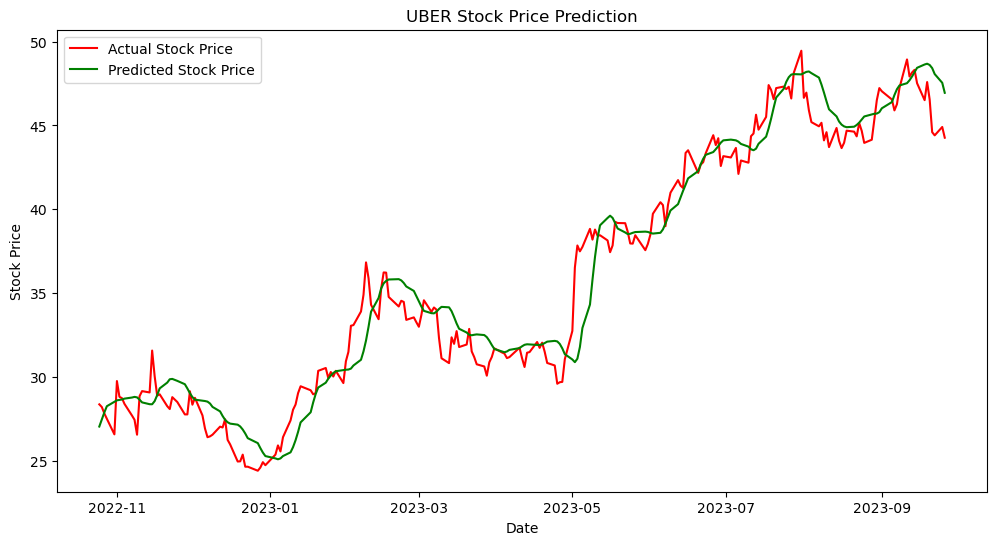

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index[60:], y_test, color="red", label="Actual Stock Price")
plt.plot(df_test.index[60:], predict_price, color="green", label="Predicted Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


## Forecast Future Trend

In [20]:
forecast_dates = pd.date_range(start=today_date, periods=forecast_days)
forecast_dates

DatetimeIndex(['2023-09-28', '2023-09-29', '2023-09-30', '2023-10-01',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-07'],
              dtype='datetime64[ns]', freq='D')

In [21]:
X_future = scaled_test_data
X_future

array([[0.20223326],
       [0.2983871 ],
       [0.31782466],
       [0.35215055],
       [0.35545902],
       [0.35215055],
       [0.33581471],
       [0.37179486],
       [0.36021509],
       [0.36497108],
       [0.36538465],
       [0.36311003],
       [0.32878411],
       [0.31699751],
       [0.29342432],
       [0.27253929],
       [0.26861041],
       [0.28722083],
       [0.30603807],
       [0.28453267],
       [0.28784119],
       [0.28722083],
       [0.28825476],
       [0.29156328],
       [0.29425143],
       [0.29094292],
       [0.31451615],
       [0.327957  ],
       [0.35070308],
       [0.3655914 ],
       [0.34119106],
       [0.37696442],
       [0.37861872],
       [0.35380481],
       [0.34470637],
       [0.34470637],
       [0.32361455],
       [0.28453267],
       [0.2688172 ],
       [0.24958643],
       [0.26364764],
       [0.27336644],
       [0.23986766],
       [0.24152192],
       [0.24607112],
       [0.29714642],
       [0.29693963],
       [0.308

In [22]:
forecast_data = []
for i in range(forecast_days):    
    req = []    
    req.append(X_future[-sequence:, 0])
    X_input = np.array(req)
    X_reshape = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
    y_forecast = model.predict(X_reshape)
    X_future = np.vstack((X_future, y_forecast))
    forecast_data.append(np.array(y_forecast[0]))   

1/1 [==============================] - 0s 42ms/step


In [23]:
forecast_data = sc.inverse_transform(forecast_data)
forecast_data

array([[46.34799663],
       [45.9060374 ],
       [45.69347751],
       [45.69654447],
       [45.85682481],
       [46.10859508],
       [46.39999947],
       [46.6992442 ],
       [46.99133173],
       [47.27175386]])

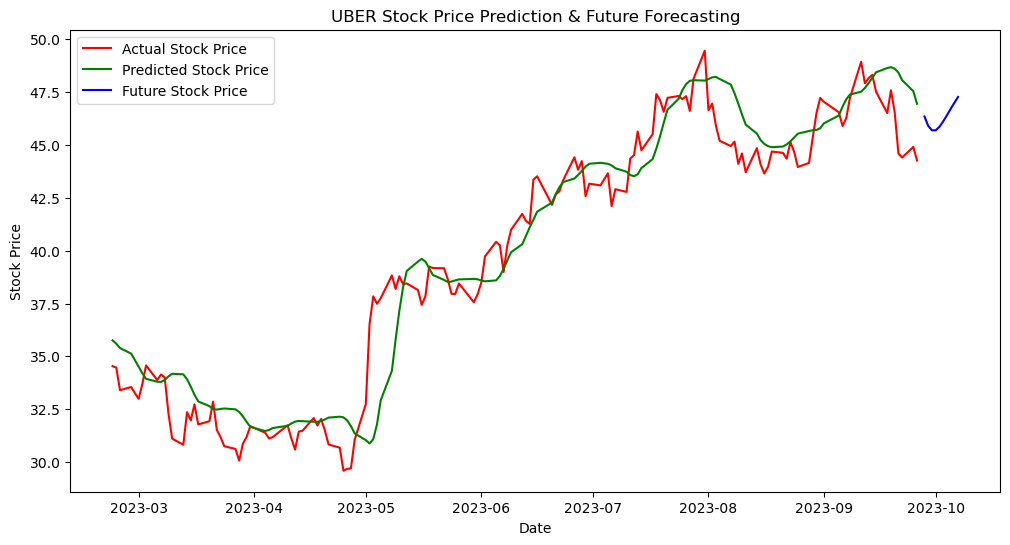

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index[-150:], y_test[-150:], color="red", label="Actual Stock Price")
plt.plot(df_test.index[-150:], predict_price[-150:], color="green", label="Predicted Stock Price")
plt.plot(forecast_dates, forecast_data, color="blue", label="Future Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction & Future Forecasting")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

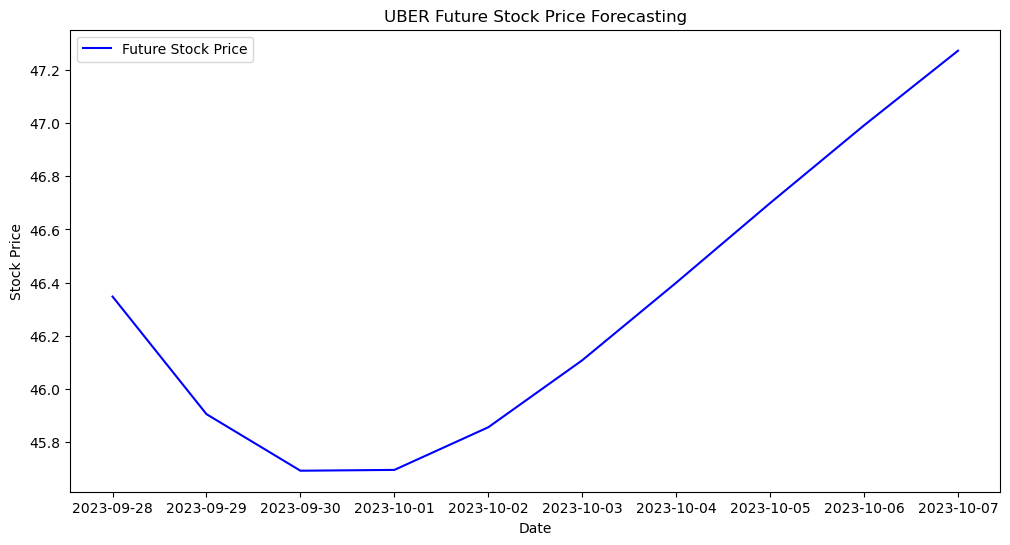

In [25]:
plt.figure(figsize=(12,6))
plt.plot(forecast_dates, forecast_data, color="blue", label="Future Stock Price")
plt.title(f"{stock_symbol} Future Stock Price Forecasting")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()